# Load Image

In [ ]:
!unzip /content/Ulises_counts.zip

Archive:  /content/Ulises_counts.zip
   creating: Ulises_counts/
  inflating: Ulises_counts/MN count.xlsx  
   creating: Ulises_counts/Day 3 count/
   creating: Ulises_counts/Day 6 count/
  inflating: Ulises_counts/MNcounts_nadmod.csv  
  inflating: __MACOSX/Ulises_counts/._MNcounts_nadmod.csv  
  inflating: Ulises_counts/._MNcounts_nadmod.csv  
  inflating: Ulises_counts/Day 3 count/VID3664_A4_1_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A4_2_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A4_3_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A4_4_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A5_1_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A5_2_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A5_3_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 count/VID3664_A5_4_2024y08m03d_17h27m.jpg  
  inflating: Ulises_counts/Day 3 cou

In [ ]:
!zip -r A4.zip A4/

  adding: A4/ (stored 0%)
  adding: A4/tile_23.png (deflated 0%)
  adding: A4/tile_19.png (deflated 1%)
  adding: A4/tile_15.png (deflated 0%)
  adding: A4/tile_18.png (deflated 0%)
  adding: A4/tile_11.png (deflated 0%)
  adding: A4/tile_0.png (deflated 0%)
  adding: A4/tile_20.png (deflated 0%)
  adding: A4/tile_26.png (deflated 0%)
  adding: A4/tile_22.png (deflated 0%)
  adding: A4/tile_12.png (deflated 0%)
  adding: A4/tile_3.png (deflated 0%)
  adding: A4/tile_21.png (deflated 0%)
  adding: A4/tile_14.png (deflated 1%)
  adding: A4/tile_1.png (deflated 0%)
  adding: A4/tile_5.png (deflated 0%)
  adding: A4/tile_13.png (deflated 0%)
  adding: A4/tile_9.png (deflated 1%)
  adding: A4/tile_4.png (deflated 1%)
  adding: A4/tile_2.png (deflated 0%)
  adding: A4/tile_28.png (deflated 0%)
  adding: A4/tile_29.png (deflated 1%)
  adding: A4/tile_6.png (deflated 0%)
  adding: A4/tile_8.png (deflated 0%)
  adding: A4/tile_7.png (deflated 0%)
  adding: A4/tile_27.png (deflated 0%)
  adding:

In [ ]:
import json
import os
from PIL import Image
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

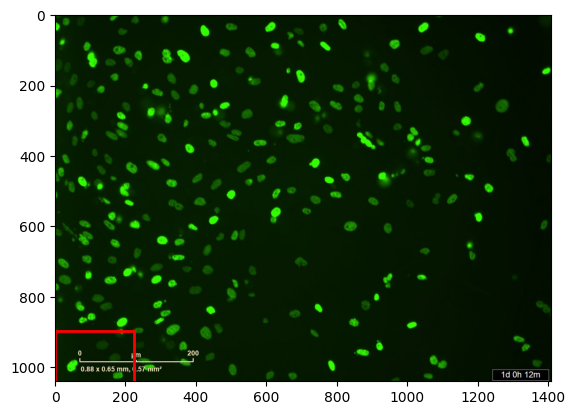

In [ ]:
# Load an image using PIL
image_path = '/content/Ulises_counts/Day 3 count/VID3664_A6_1_2024y08m03d_17h27m.jpg'
image = Image.open(image_path)

# Create a figure and axis
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Define a sequence of boxes, each box is defined by (x, y, width, height)
boxes = []

# box_w, box_h = 470, 350
# x,y = 470, 350

box_w, box_h = 224, 224
x,y = 224, 224

for i in range(35):
  if i != 4: continue
  # tile image
  cur_x, cur_y = x * (i//5), y * (i%5)
  box = (cur_x, cur_y, box_w, box_h)
  boxes.append(box)

# Draw each box on the image
for box in boxes:
    rect = patches.Rectangle(
        (box[0], box[1]),  # (x, y)
        box[2],  # width
        box[3],  # height
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

# Show the final image with boxes
plt.show()

In [ ]:
image_path = "/content/Olivieri_panel_titration_GFP-H2B/Plate 1_GFP-H2B_C10_1_2024y02m22d_09h41m.tif"
box_w, box_h = 224, 224
x,y = 224, 224
im = Image.open(image_path)
for i in range(35):
  # tile image
  cur_x, cur_y = x * (i//5), y * (i%5)
  box = (cur_x, cur_y, cur_x + box_w, cur_y + box_h)
  img2 = im.crop(box)
  img2.save(f'tile_{i}.png')

# Load model

In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything-2.git'

!mkdir -p images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything-2/main/notebooks/images/truck.jpg
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything-2/main/notebooks/images/groceries.jpg

!mkdir -p ../checkpoints/
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt
!wget -P ../checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_small.pt

PyTorch version: 2.4.0+cu121
Torchvision version: 0.19.0+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything-2.git to /tmp/pip-req-build-b_lkvmlb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything-2.git /tmp/pip-req-build-b_lkvmlb
  Resolved https://github.com/facebookresearch/segment-anything-2.git to commit 7e1596c0b6462eb1d1ba7e1492430fed95023598
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.6 MB/s eta 0:00:00
--2024-09-1

In [ ]:
import os
# if using Apple MPS, fall back to CPU for unsupported ops
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

# select the device for computation
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    # use bfloat16 for the entire notebook
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    # turn on tfloat32 for Ampere GPUs (https://pytorch.org/docs/stable/notes/cuda.html#tensorfloat-32-tf32-on-ampere-devices)
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True
elif device.type == "mps":
    print(
        "\nSupport for MPS devices is preliminary. SAM 2 is trained with CUDA and might "
        "give numerically different outputs and sometimes degraded performance on MPS. "
        "See e.g. https://github.com/pytorch/pytorch/issues/84936 for a discussion."
    )

# Predict

## SAM

In [ ]:
np.random.seed(3)

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1)

    ax.imshow(img)

In [ ]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

sam2_checkpoint = "../checkpoints/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

sam2 = build_sam2(model_cfg, sam2_checkpoint, device=device, apply_postprocessing=False)

mask_generator = SAM2AutomaticMaskGenerator(sam2)

In [ ]:

image_paths = ['images/GFP-H2B_A1_1_2023y07m02d_11h02m.png', 'images/GFP-H2B_A4_1_2023y07m02d_11h02m.png','images/GFP-H2B_B1_1_2023y07m02d_11h02m.png',
              'images/GFP-H2B_B4_1_2023y07m02d_11h02m.png','images/GFP-H2B_C1_1_2023y07m02d_11h02m.png','images/GFP-H2B_C4_1_2023y07m02d_11h02m.png']
for image_path in image_paths:
  im = Image.open(image_path)
  mn_cnt = 0
  nuc_cnt = 0
  for i in range(30):
    # tile image
    cur_x, cur_y = x * (i//5), y * (i%5)
    box = (cur_x, cur_y, cur_x + box_w, cur_y + box_h)
    img2 = im.crop(box)
    img2 = np.array(img2.convert("RGB"))
    masks = mask_generator.generate(img2)
    for ann in masks:
      m = ann['segmentation']
      if np.sum(m) > 30:
        nuc_cnt += 1
      else:
        mn_cnt += 1
  print(image_path, mn_cnt, nuc_cnt)

images/GFP-H2B_A1_1_2023y07m02d_11h02m.png 4 467
images/GFP-H2B_A4_1_2023y07m02d_11h02m.png 29 536
images/GFP-H2B_B1_1_2023y07m02d_11h02m.png 4 229
images/GFP-H2B_B4_1_2023y07m02d_11h02m.png 17 426
images/GFP-H2B_C1_1_2023y07m02d_11h02m.png 13 449
images/GFP-H2B_C4_1_2023y07m02d_11h02m.png 45 845


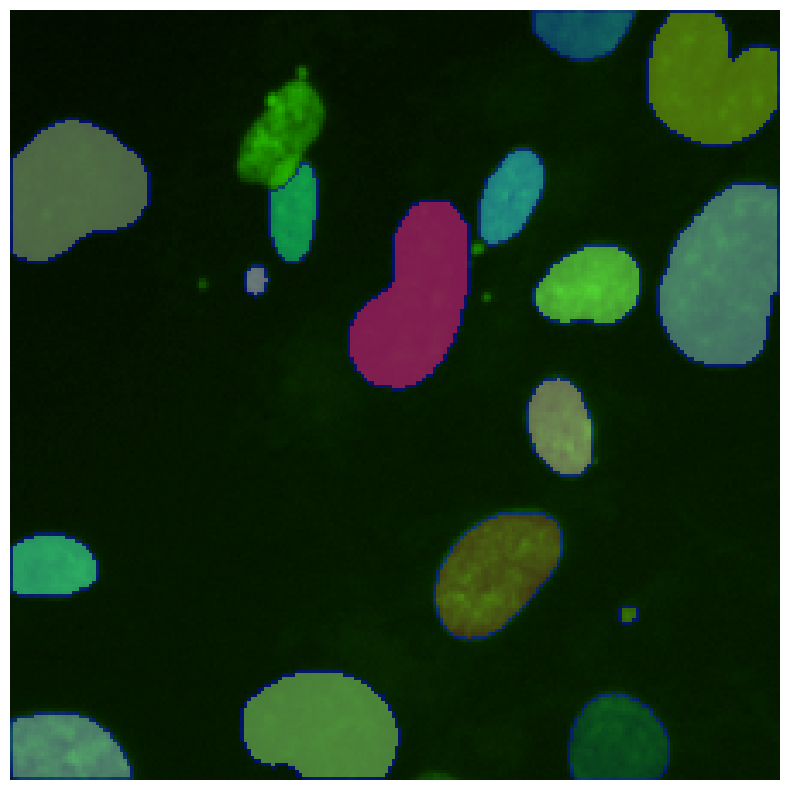

In [ ]:
image_path = "tile_10.png"
img2 = Image.open(image_path)
img2 = np.array(img2.convert("RGB"))
masks = mask_generator.generate(img2)

plt.figure(figsize=(10, 10))
plt.imshow(img2)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
for ann in masks:
  m = ann['segmentation']
  if np.sum(m) > 30: continue
  show_anns([ann])
plt.axis('off')
plt.show()

## RCNN

In [ ]:
!cp /content/drive/MyDrive/PMCC/models/RCNN.pt RCNN.pt

In [ ]:
import matplotlib.pyplot as plt
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision.transforms import v2 as T
from torchvision.ops import nms

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor



In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 216MB/s]


In [ ]:
# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

# move model to the right device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.load_state_dict(torch.load("RCNN.pt"))

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 239MB/s]
<ipython-input-5-4ec11b2395c9>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don'

<All keys matched successfully>

In [ ]:
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

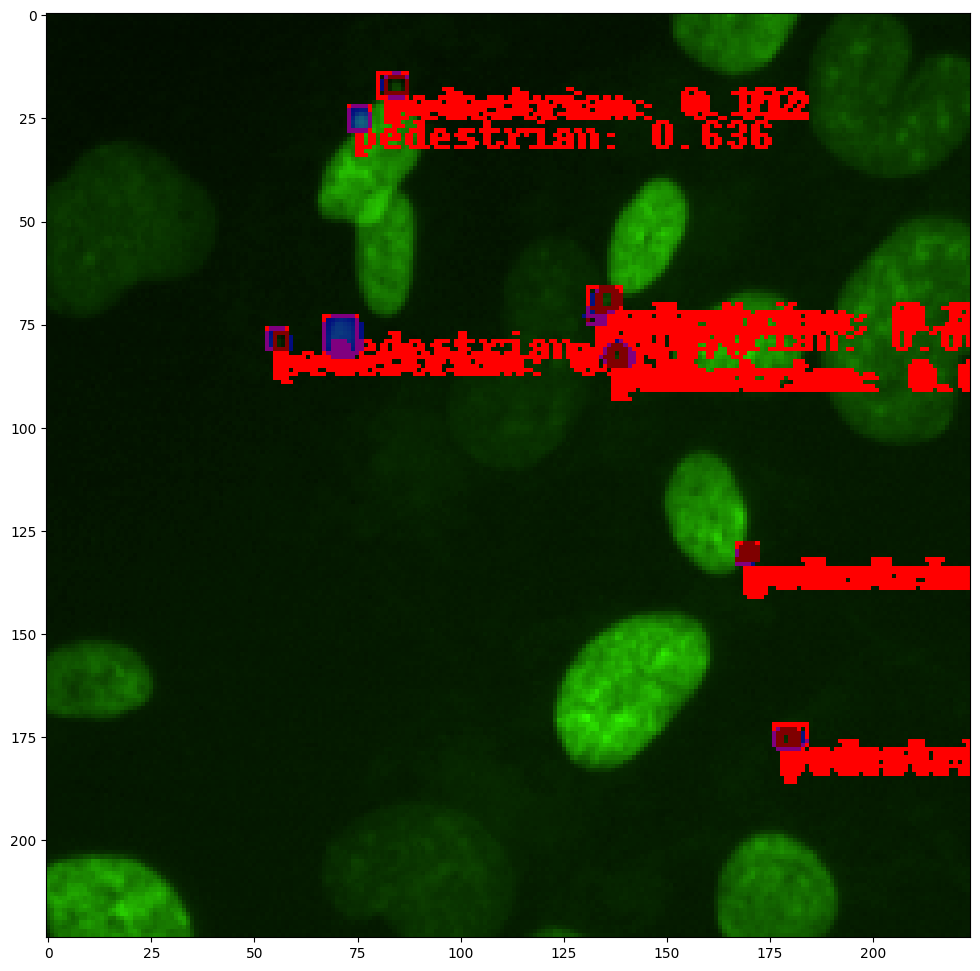

In [ ]:
image = read_image("tile_10.png")
eval_transform = get_transform(train=False)

model.eval()
with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model([x, ])
    pred = predictions[0]


image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]
pred_labels = [f"pedestrian: {score:.3f}" for lSabel, score in zip(pred["labels"], pred["scores"])]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="red")

masks = (pred["masks"] > 0.3).squeeze(1)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

In [ ]:
pred

{'boxes': tensor([[ 67.4005,  73.9689,  75.9595,  82.8311],
         [134.3889,  66.5914, 138.8911,  71.1686],
         [ 82.7616,  15.2908,  87.4784,  19.4292],
         [ 53.9166,  76.6313,  58.0834,  81.2887],
         [137.1597,  81.1390, 140.6003,  84.6210],
         [177.9332, 173.5176, 182.7068, 178.1624],
         [ 73.8466,  22.9296,  78.4734,  28.3104],
         [176.7578, 172.4238, 181.6422, 177.0162],
         [133.3796,  67.3040, 137.6604,  71.0160],
         [169.1624, 129.3587, 171.3176, 132.7213],
         [168.1945, 128.8001, 172.2855, 132.1599],
         [177.7104, 174.5966, 180.6896, 177.0834],
         [136.8839,  80.1959, 141.9962,  85.5641],
         [135.1432,  80.0890, 140.3768,  85.6710],
         [178.6740, 172.2659, 184.2060, 177.1741],
         [131.9034,  66.6510, 139.1366,  73.9090],
         [ 80.7943,  14.5118,  87.2057,  20.6282],
         [168.0622, 129.3079, 170.1778, 132.7720],
         [167.2593, 128.7608, 170.9807, 133.3192],
         [ 55.3554,  7

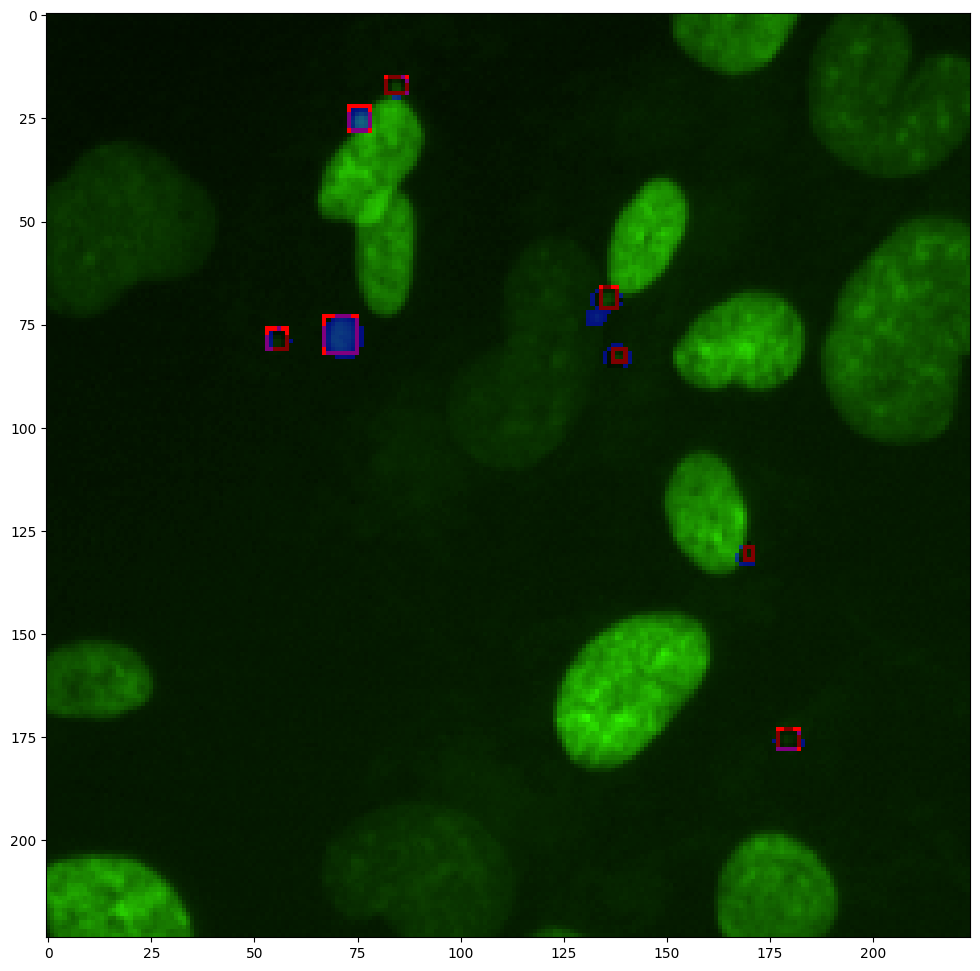

In [ ]:

image = read_image("tile_10.png")
eval_transform = get_transform(train=False)

model.eval()
with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model([x, ])
    pred = predictions[0]

image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]

ind = nms(pred["boxes"], pred["scores"], 0.2)
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes[ind][pred["scores"][ind]>0.4], colors="red")

masks = (pred["masks"] > 0.6).squeeze(1)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

In [ ]:
image_paths = ['images/GFP-H2B_A1_1_2023y07m02d_11h02m.png', 'images/GFP-H2B_A4_1_2023y07m02d_11h02m.png','images/GFP-H2B_B1_1_2023y07m02d_11h02m.png',
              'images/GFP-H2B_B4_1_2023y07m02d_11h02m.png','images/GFP-H2B_C1_1_2023y07m02d_11h02m.png','images/GFP-H2B_C4_1_2023y07m02d_11h02m.png']

for image_path in image_paths:
  im = Image.open(image_path)
  mn_cnt = 0
  nuc_cnt = 0
  for i in range(30):
    # tile image
    wnd_sz = 224
    cur_x, cur_y = wnd_sz * (i//5), wnd_sz * (i%5)
    box = (cur_x, cur_y, cur_x + wnd_sz, cur_y + wnd_sz)
    # print(box)
    img2 = im.crop(box)
    img2.save(f'tile.png')

    image = read_image("tile.png")
    eval_transform = get_transform(train=False)

    model.eval()
    with torch.no_grad():
        x = eval_transform(image)
        # convert RGBA -> RGB and move to device
        x = x[:3, ...].to(device)
        predictions = model([x, ])
        pred = predictions[0]

    image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
    image = image[:3, ...]

    ind = nms(pred["boxes"], pred["scores"], 0.2)
    # print(ind)
    pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
    pred_boxes = pred["boxes"].long()
    mn_cnt += len(pred_boxes[ind][pred["scores"][ind]>0.6])
  print(image_path, mn_cnt)

images/GFP-H2B_A1_1_2023y07m02d_11h02m.png 7
images/GFP-H2B_A4_1_2023y07m02d_11h02m.png 197
images/GFP-H2B_B1_1_2023y07m02d_11h02m.png 35
images/GFP-H2B_B4_1_2023y07m02d_11h02m.png 79
images/GFP-H2B_C1_1_2023y07m02d_11h02m.png 124
images/GFP-H2B_C4_1_2023y07m02d_11h02m.png 419


### utils

In [ ]:
import matplotlib.pyplot as plt
import os
import torch

from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision.transforms import v2 as T
from torchvision.ops import nms

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.transforms.functional import pil_to_tensor

def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

def load_weight(model, path):
  model.load_state_dict(torch.load(path))

def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

def countImage(image_path, model):
  im = Image.open(image_path)
  mn_cnt = 0
  nuc_cnt = 0
  for i in range(35):
    # skip footer
    if i in [4,9,29]: continue

    # tile image
    wnd_sz = 224
    cur_x, cur_y = wnd_sz * (i//5), wnd_sz * (i%5)
    box = (cur_x, cur_y, cur_x + wnd_sz, cur_y + wnd_sz)

    image = pil_to_tensor(im.crop(box))
    eval_transform = get_transform(train=False)

    model.eval()
    with torch.no_grad():
        x = eval_transform(image)
        # convert RGBA -> RGB and move to device
        x = x[:3, ...].to(device)
        predictions = model([x, ])
        pred = predictions[0]

    image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
    image = image[:3, ...]

    ind = nms(pred["boxes"], pred["scores"], 0.2)
    # print(ind)
    pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
    pred_boxes = pred["boxes"].long()
    mn_cnt += len(pred_boxes[ind][pred["scores"][ind]>0.6])
  return mn_cnt

# Evaluate

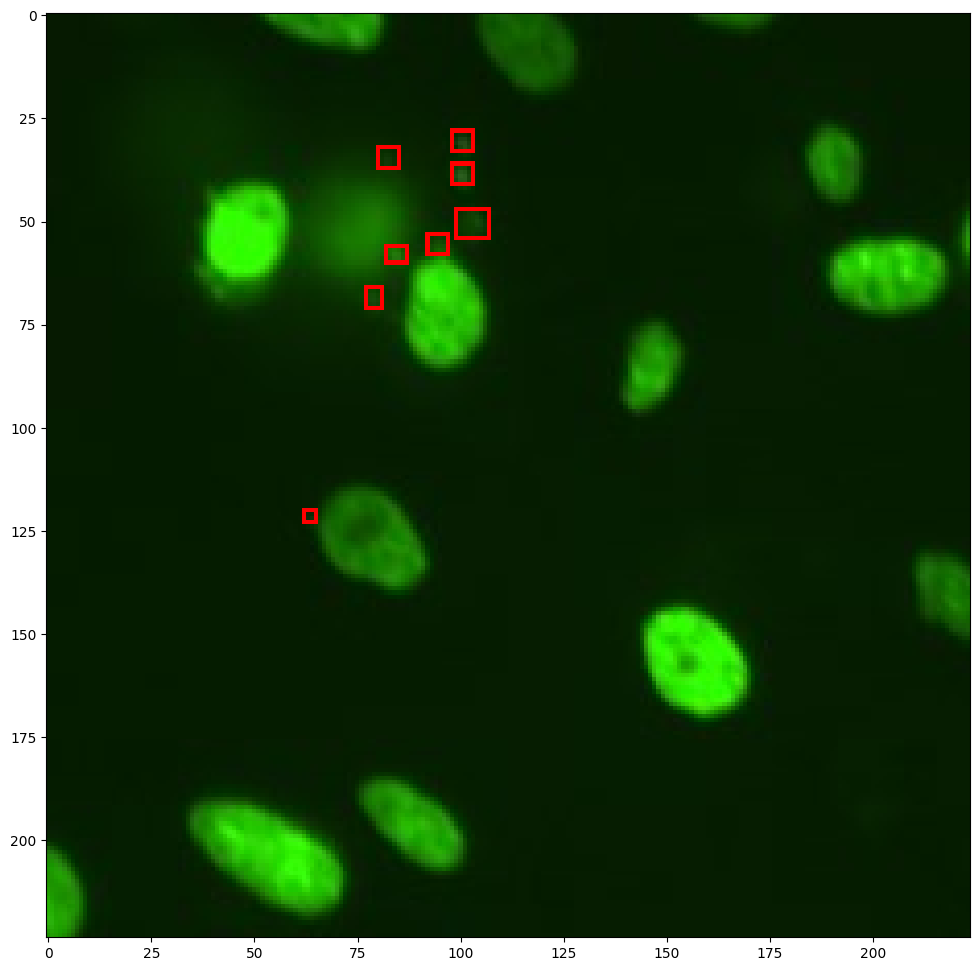

In [ ]:
from torchvision.ops import nms

image = read_image("tile_6.png")
eval_transform = get_transform(train=False)

model.eval()
with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model([x, ])
    pred = predictions[0]

image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]

ind = nms(pred["boxes"], pred["scores"], 0.2)
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes[ind][pred["scores"][ind]>0.4], colors="red")

# masks = (pred["masks"] > 0.6).squeeze(1)
# output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

In [ ]:
# predict all the images and write into data frame

import os

pred = [[],[]]
folders = ["/content/Ulises_counts/Day 3 count", "/content/Ulises_counts/Day 6 count"]
for i in range(2):
  folder = folders[i]
  image_paths = sorted(os.listdir(folder))

  for image_path in image_paths:
     _, cnt = countImage(os.path.join(folder,image_path))
     pred[i].append(cnt)



In [ ]:
import pandas as pd

csv_path = "/content/Ulises_counts/MNcounts_nadmod.csv"

df = pd.read_csv(csv_path)

df['3 days pred'] = pred[0]
df['6 days pred'] = pred[1]

df

,Image,3 days count,6 days count,Identifier,3 days pred,6 days pred
0,1,5,22,A4_1,3,30
1,2,7,7,A4_2,10,12
2,3,5,4,A4_3,4,4
3,4,0,0,A4_4,0,1
4,5,14,19,A5_1,19,40
5,6,1,3,A5_2,1,5
6,7,1,1,A5_3,1,2
7,8,0,0,A5_4,0,0
8,9,17,24,A6_1,34,28
9,10,1,3,A6_2,1,7


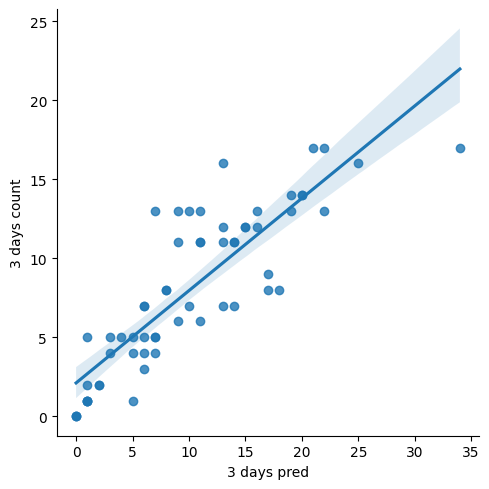

In [ ]:
# @title 3 days pred vs 3 days Count

from matplotlib import pyplot as plt
# df.plot(kind='scatter', x='3 days pred', y='3 days count', s=32, alpha=.8)
sns.lmplot(x='3 days pred', y='3 days count',data=df,fit_reg=True)
plt.gca().spines[['top', 'right',]].set_visible(False)

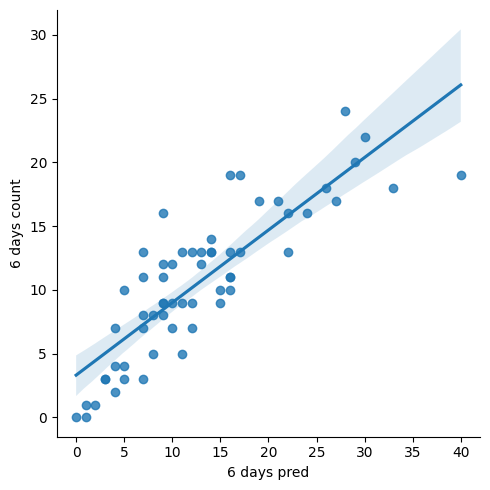

In [ ]:
# @title 6 days pred vs 6 days Count

from matplotlib import pyplot as plt
import seaborn as sns
# df.plot(kind='scatter', x='6 days pred', y='6 days count', s=32, alpha=.8)
sns.lmplot(x='6 days pred', y='6 days count',data=df,fit_reg=True)
plt.gca().spines[['top', 'right',]].set_visible(False)

The regression slope is [[1.257376]], intercept is [0.04478988]


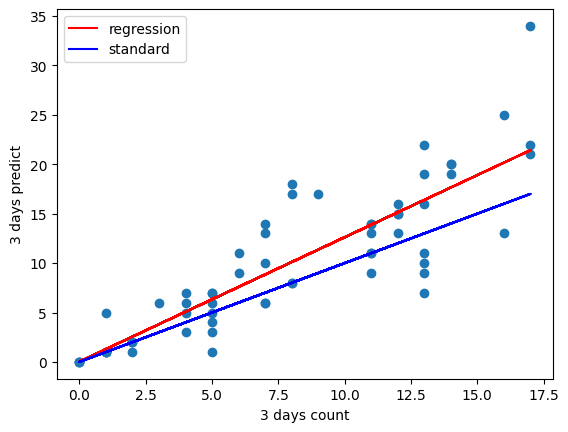

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 1].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.iloc[:, 4].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', label="regression")
plt.plot(X, X, color='blue', label="standard")

plt.xlabel("3 days count")
plt.ylabel("3 days predict")
plt.legend()
plt.show()

The regression slope is [[1.25837112]], intercept is [-0.50165245]


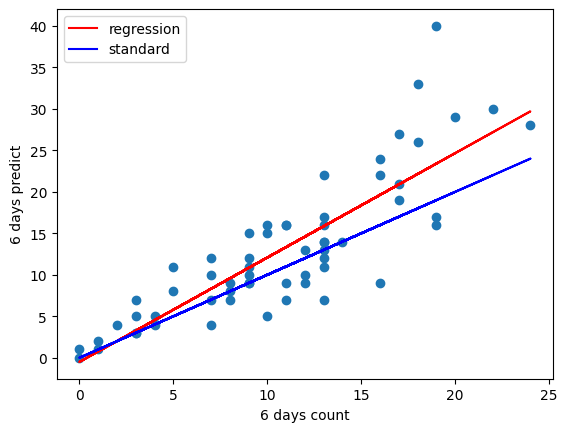

In [ ]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 2].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.iloc[:, 5].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
print(f"The regression slope is {linear_regressor.coef_}, intercept is {linear_regressor.intercept_}")

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', label="regression")
plt.plot(X, X, color='blue', label="standard")

plt.xlabel("6 days count")
plt.ylabel("6 days predict")
plt.legend()
plt.show()

In [ ]:
df.to_csv('out.csv', index=False)

## Oliv data


In [ ]:
!cp /content/drive/MyDrive/PMCC/Dataset/Olivieri_panel_titration_GFP-H2B.zip Olivieri_panel_titration_GFP-H2B.zip
!unzip Olivieri_panel_titration_GFP-H2B.zip

!cp /content/drive/MyDrive/PMCC/models/RCNN.pt RCNN.pt

Archive:  Olivieri_panel_titration_GFP-H2B.zip
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C10_1_2024y02m24d_09h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C10_1_2024y02m25d_09h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C13_1_2024y02m28d_09h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C13_1_2024y02m28d_21h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C16_1_2024y02m25d_09h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C18_1_2024y02m26d_21h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C5_1_2024y02m22d_09h41m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C5_1_2024y02m23d_09h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C5_1_2024y02m23d_21h40m.tif  
  inflating: Olivieri_panel_titration_GFP-H2B/._Plate 1_GFP-H2B_C5_1_2024y02m26d_21h40m.tif  
  infla

In [69]:
# predict all the images and write into data frame

import os
import pandas as pd
from tqdm import tqdm

num_class = 2
model = get_model_instance_segmentation(num_class)
load_weight(model, "RCNN.pt")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

img = []
pred = []

folder = "/content/Olivieri_panel_titration_GFP-H2B"
image_paths = os.listdir(folder)
print(len(image_paths))

for image_name in tqdm(image_paths):
  if image_name[:2] == "._": continue
  cnt = countImage(os.path.join(folder,image_name), model)
  pred.append(cnt)
  img.append(image_name)

df = pd.DataFrame({"image":img,"cnt":pred})
df.to_csv('oliv_out.csv', index=False)

!cp oliv_out.csv /content/drive/MyDrive/PMCC/

from google.colab import runtime
runtime.unassign()

<ipython-input-61-770d213f8814>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


4624


100%|██████████| 4624/4624 [4:02:01<00:00,  3.14s/it]
